In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

label_path = "/content/drive/MyDrive/guntunk/Labels"
for file_name in os.listdir(label_path):
    if file_name.endswith(".txt"):
        with open(os.path.join(label_path, file_name), 'r') as f:

            print(f"File: {file_name}")
            print(f.read())


File: 317.txt
1
211 89 295 131

File: 50.txt
1
102 27 179 60

File: 47.txt
2
111 40 136 67
194 101 227 135

File: 14.txt
1
128 58 181 110

File: 111.txt
2
9 58 58 140
77 65 127 134

File: 63.txt
2
205 12 223 25
188 15 209 27

File: 42.txt
1
36 27 85 62

File: 143.txt
1
164 32 226 62

File: 159.txt
2
69 64 137 88
169 64 238 89

File: 282.txt
1
207 87 297 136

File: 169.txt
1
119 83 247 133

File: 319.txt
2
143 35 271 101
12 94 105 139

File: 83.txt
1
9 7 227 165

File: 23.txt
1
34 28 95 79

File: 244.txt
1
94 60 178 128

File: 178.txt
1
113 47 251 94

File: 179.txt
1
180 84 247 127

File: 238.txt
1
70 57 194 113

File: 166.txt
1
11 101 200 145

File: 58.txt
1
109 60 193 92

File: 122.txt
2
21 38 50 82
101 35 135 63

File: 278.txt
1
37 17 142 176

File: 283.txt
1
173 67 240 124

File: 197.txt
1
73 54 151 98

File: 210.txt
1
148 25 252 101

File: 130.txt
1
45 141 124 207

File: 69.txt
1
45 45 94 146

File: 298.txt
1
117 19 342 107

File: 151.txt
1
75 74 162 103

File: 180.txt
3
22 102 288

In [ ]:
import os

label_path = "/content/drive/MyDrive/guntunk/Labels"
img_width = 1920  # ইমেজের প্রস্থ
img_height = 1080  # ইমেজের উচ্চতা

for file_name in os.listdir(label_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(label_path, file_name)
        with open(file_path, 'r') as f:
            lines = f.readlines()

        # ক্লাস আইডি ও বাউন্ডিং বক্স আলাদা করা
        class_id = lines[0].strip()
        bbox = list(map(int, lines[1].strip().split()))

        x_min, y_min, x_max, y_max = bbox

        # YOLO ফরম্যাটে রূপান্তর
        x_center = (x_min + x_max) / (2 * img_width)
        y_center = (y_min + y_max) / (2 * img_height)
        width = (x_max - x_min) / img_width
        height = (y_max - y_min) / img_height

        # নতুন ফরম্যাট তৈরি
        yolo_format = f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}\n"

        # নতুন ফরম্যাট ফাইলে সংরক্ষণ
        with open(file_path, 'w') as f:
            f.write(yolo_format)

        print(f"Updated: {file_name} -> {yolo_format.strip()}")


Updated: 317.txt -> 1 0.131771 0.101852 0.043750 0.038889
Updated: 50.txt -> 1 0.073177 0.040278 0.040104 0.030556
Updated: 47.txt -> 2 0.064323 0.049537 0.013021 0.025000
Updated: 14.txt -> 1 0.080469 0.077778 0.027604 0.048148
Updated: 111.txt -> 2 0.017448 0.091667 0.025521 0.075926
Updated: 63.txt -> 2 0.111458 0.017130 0.009375 0.012037
Updated: 42.txt -> 1 0.031510 0.041204 0.025521 0.032407
Updated: 143.txt -> 1 0.101562 0.043519 0.032292 0.027778
Updated: 159.txt -> 2 0.053646 0.070370 0.035417 0.022222
Updated: 282.txt -> 1 0.131250 0.103241 0.046875 0.045370
Updated: 169.txt -> 1 0.095312 0.100000 0.066667 0.046296
Updated: 319.txt -> 2 0.107813 0.062963 0.066667 0.061111
Updated: 83.txt -> 1 0.061458 0.079630 0.113542 0.146296
Updated: 23.txt -> 1 0.033594 0.049537 0.031771 0.047222
Updated: 244.txt -> 1 0.070833 0.087037 0.043750 0.062963
Updated: 178.txt -> 1 0.094792 0.065278 0.071875 0.043519
Updated: 179.txt -> 1 0.111198 0.097685 0.034896 0.039815
Updated: 238.txt -> 1

In [ ]:
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg -O yolov3.cfg

--2025-01-29 10:07:02--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2025-01-29 10:07:03 (56.8 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [ ]:
import os

label_path = "/content/drive/MyDrive/guntunk/Labels"  # লেবেলের অবস্থান
valid_classes = {'1', '2'}  # শুধুমাত্র যেসব ক্লাস রাখবেন

for file_name in os.listdir(label_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(label_path, file_name)

        with open(file_path, 'r') as f:
            lines = f.readlines()

        filtered_lines = []
        for line in lines:
            parts = line.strip().split()
            class_id = parts[0]  # ক্লাস আইডি আলাদা করা
            if class_id in valid_classes:
                filtered_lines.append(line)

        # নতুন ফরম্যাট অনুযায়ী ফাইল আপডেট
        with open(file_path, 'w') as f:
            f.writelines(filtered_lines)

        print(f"Updated: {file_name}, Remaining Entries: {len(filtered_lines)}")

Updated: 317.txt, Remaining Entries: 1
Updated: 50.txt, Remaining Entries: 1
Updated: 47.txt, Remaining Entries: 1
Updated: 14.txt, Remaining Entries: 1
Updated: 111.txt, Remaining Entries: 1
Updated: 63.txt, Remaining Entries: 1
Updated: 42.txt, Remaining Entries: 1
Updated: 143.txt, Remaining Entries: 1
Updated: 159.txt, Remaining Entries: 1
Updated: 282.txt, Remaining Entries: 1
Updated: 169.txt, Remaining Entries: 1
Updated: 319.txt, Remaining Entries: 1
Updated: 83.txt, Remaining Entries: 1
Updated: 23.txt, Remaining Entries: 1
Updated: 244.txt, Remaining Entries: 1
Updated: 178.txt, Remaining Entries: 1
Updated: 179.txt, Remaining Entries: 1
Updated: 238.txt, Remaining Entries: 1
Updated: 166.txt, Remaining Entries: 1
Updated: 58.txt, Remaining Entries: 1
Updated: 122.txt, Remaining Entries: 1
Updated: 278.txt, Remaining Entries: 1
Updated: 283.txt, Remaining Entries: 1
Updated: 197.txt, Remaining Entries: 1
Updated: 210.txt, Remaining Entries: 1
Updated: 130.txt, Remaining Entri

In [ ]:
import os

label_path = "/content/drive/MyDrive/guntunk/Labels"  # লেবেলের অবস্থান

# শুধুমাত্র 1 এবং 2 ক্লাস অনুমোদিত, এবং তাদেরকে 0, 1 এ পরিবর্তন করতে হবে
class_mapping = {'1': '0', '2': '1'}

for file_name in os.listdir(label_path):
    if file_name.endswith(".txt"):
        file_path = os.path.join(label_path, file_name)

        with open(file_path, 'r') as f:
            lines = f.readlines()

        updated_lines = []
        for line in lines:
            parts = line.strip().split()
            class_id = parts[0]
            if class_id in class_mapping:
                parts[0] = class_mapping[class_id]  # ক্লাস আইডি আপডেট
                updated_line = " ".join(parts)  # নতুন লাইন তৈরি
                updated_lines.append(updated_line + "\n")

        # নতুন ফরম্যাট অনুযায়ী ফাইল আপডেট
        with open(file_path, 'w') as f:
            f.writelines(updated_lines)

        print(f"Updated: {file_name}, Remaining Entries: {len(updated_lines)}")

print("Class ID mapping and cleanup completed successfully!")


Updated: 317.txt, Remaining Entries: 1
Updated: 50.txt, Remaining Entries: 1
Updated: 47.txt, Remaining Entries: 1
Updated: 14.txt, Remaining Entries: 1
Updated: 111.txt, Remaining Entries: 1
Updated: 63.txt, Remaining Entries: 1
Updated: 42.txt, Remaining Entries: 1
Updated: 143.txt, Remaining Entries: 1
Updated: 159.txt, Remaining Entries: 1
Updated: 282.txt, Remaining Entries: 1
Updated: 169.txt, Remaining Entries: 1
Updated: 319.txt, Remaining Entries: 1
Updated: 83.txt, Remaining Entries: 1
Updated: 23.txt, Remaining Entries: 1
Updated: 244.txt, Remaining Entries: 1
Updated: 178.txt, Remaining Entries: 1
Updated: 179.txt, Remaining Entries: 1
Updated: 238.txt, Remaining Entries: 1
Updated: 166.txt, Remaining Entries: 1
Updated: 58.txt, Remaining Entries: 1
Updated: 122.txt, Remaining Entries: 1
Updated: 278.txt, Remaining Entries: 1
Updated: 283.txt, Remaining Entries: 1
Updated: 197.txt, Remaining Entries: 1
Updated: 210.txt, Remaining Entries: 1
Updated: 130.txt, Remaining Entri

In [ ]:
# import os

# label_path = "/content/drive/MyDrive/guntunk/Labels"
# valid_classes = {'1', '2'}  # অনুমোদিত ক্লাস

# found_invalid = False  # ফ্ল্যাগ ভ্যারিয়েবল

# for file_name in os.listdir(label_path):
#     if file_name.endswith(".txt"):
#         file_path = os.path.join(label_path, file_name)
#         with open(file_path, 'r') as f:
#             lines = f.readlines()

#         for line in lines:
#             parts = line.strip().split()
#             class_id = parts[0]
#             if class_id not in valid_classes:
#                 print(f"Error: Invalid class {class_id} found in {file_name}")
#                 found_invalid = True

# if not found_invalid:
#     print("No invalid classes found. All files are correctly labeled!")


No invalid classes found. All files are correctly labeled!


In [ ]:
from PIL import Image
import os

image_path = "/content/drive/MyDrive/guntunk/Images"
for file in os.listdir(image_path):
    if file.endswith(".png") or file.endswith(".jpeg"):  # .png বা .jpeg ফাইল
        img = Image.open(os.path.join(image_path, file))
        file_name = os.path.splitext(file)[0] + ".jpg"
        img.convert("RGB").save(os.path.join(image_path, file_name))
        os.remove(os.path.join(image_path, file))  # আগের ফাইল ডিলিট করুন

print("Conversion complete!")

Conversion complete!


In [ ]:
import os
import random
import shutil

# ডেটাসেট লোকেশন
image_dir = "/content/drive/MyDrive/guntunk/Images"
label_dir = "/content/drive/MyDrive/guntunk/Labels"

# নতুন ফোল্ডার তৈরি
split_dir = "/content/drive/MyDrive/guntunk/split_data"
os.makedirs(split_dir, exist_ok=True)

for split in ['train', 'val', 'test']:
    os.makedirs(os.path.join(split_dir, split, 'images'), exist_ok=True)
    os.makedirs(os.path.join(split_dir, split, 'labels'), exist_ok=True)

# ইমেজ এবং লেবেল ফাইল লোড
image_files = [f for f in os.listdir(image_dir) if f.endswith(".jpg")]
random.shuffle(image_files)

# স্প্লিট রেশিও সেট (Train: 70%, Val: 15%, Test: 15%)
train_size = int(0.70 * len(image_files))
val_size = int(0.15 * len(image_files))

train_files = image_files[:train_size]
val_files = image_files[train_size:train_size + val_size]
test_files = image_files[train_size + val_size:]

# ফাইল গুলোর ট্রেনিং, ভ্যালিডেশন ও টেস্ট সেটে স্থানান্তর
def move_files(files, split):
    for file in files:
        shutil.move(os.path.join(image_dir, file), os.path.join(split_dir, split, 'images', file))
        label_file = os.path.splitext(file)[0] + ".txt"
        shutil.move(os.path.join(label_dir, label_file), os.path.join(split_dir, split, 'labels', label_file))

move_files(train_files, 'train')
move_files(val_files, 'val')
move_files(test_files, 'test')

print("Dataset split complete!")


Dataset split complete!


In [ ]:
train_path = "/content/drive/MyDrive/guntunk/split_data/train/images"
val_path = "/content/drive/MyDrive/guntunk/split_data/val/images"
test_path = "/content/drive/MyDrive/guntunk/split_data/test/images"

print("Train images:", len([f for f in os.listdir(train_path) if f.endswith(".jpg")]))
print("Validation images:", len([f for f in os.listdir(val_path) if f.endswith(".jpg")]))
print("Test images:", len([f for f in os.listdir(test_path) if f.endswith(".jpg")]))


Train images: 233
Validation images: 49
Test images: 51


In [ ]:
yolo_config = """
train: /content/drive/MyDrive/guntunk/split_data/train/images
val: /content/drive/MyDrive/guntunk/split_data/val/images

nc: 2  # মোট ক্লাস সংখ্যা
names: ['gun_single', 'gun_double']  # ক্লাসের নাম
"""

# yolo.yaml ফাইল সংরক্ষণ
with open("/content/drive/MyDrive/guntunk/yolo.yaml", "w") as file:
    file.write(yolo_config)

print("yolo.yaml configuration file created successfully!")


yolo.yaml configuration file created successfully!


In [ ]:
# cfg ফাইল লোড করুন
cfg_path = "yolov3.cfg"

# প্রয়োজনীয় পরিবর্তনগুলো করার জন্য Python দিয়ে লাইন সম্পাদনা
with open(cfg_path, "r") as file:
    lines = file.readlines()

# cfg ফাইল কাস্টমাইজেশন
with open(cfg_path, "w") as file:
    for line in lines:
        # classes = 2
        if "classes=" in line:
            line = "classes=2\n"
        # filters = 21 (filters = (classes + 5) * 3)
        if "filters=" in line and line.strip()[-1].isdigit():
            line = "filters=21\n"
        # batch এবং subdivisions পরিবর্তন
        if "batch=" in line:
            line = "batch=64\n"
        if "subdivisions=" in line:
            line = "subdivisions=16\n"
        file.write(line)


In [5]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov3.pt')  # Pre-trained YOLOv3 Model

results = model.train(
    data="/content/drive/MyDrive/guntunk/yolo.yaml",
    epochs=10,
    imgsz=320,
    batch=4,  # ব্যাচ সাইজ কমানো হয়েছে
    device='cpu'  # GPU এর বদলে CPU তে চালানো
)

print("Training Complete!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PRO TIP 💡 Replace 'model=yolov3.pt' with new 'model=yolov3u.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.



100%|██████████| 198M/198M [00:00<00:00, 313MB/s]


Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov3.pt, data=/content/drive/MyDrive/guntunk/yolo.yaml, epochs=10, time=None, patience=100, batch=4, imgsz=320, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

100%|██████████| 755k/755k [00:00<00:00, 85.3MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 1]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     37056  ultralytics.nn.modules.block.Bottleneck      [64, 64]                      
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    295680  ultralytics.nn.modules.block.Bottleneck      [128, 128]                    
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  8   4724736  ultralytics.nn.modules.block.Bottleneck      [256, 256]                    
  7                  -1  1   1180672  ultralytics

train: Scanning /content/drive/MyDrive/guntunk/split_data/train/labels... 233 images, 9 backgrounds, 0 corrupt: 100%|██████████| 233/233 [00:02<00:00, 92.84it/s] 


train: New cache created: /content/drive/MyDrive/guntunk/split_data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/guntunk/split_data/val/labels... 49 images, 1 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<00:00, 101.96it/s]


val: New cache created: /content/drive/MyDrive/guntunk/split_data/val/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 84 weight(decay=0.0), 91 weight(decay=0.0005), 90 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 320 train, 320 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      2.462      7.601     0.9244          1        320: 100%|██████████| 59/59 [19:04<00:00, 19.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:00<00:00,  8.71s/it]

                   all         49         48   9.29e-05     0.0122   2.87e-05   8.35e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      3.298       4.45      1.219          0        320: 100%|██████████| 59/59 [18:36<00:00, 18.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:02<00:00,  8.96s/it]

                   all         49         48    0.00017      0.061   0.000131   1.67e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      2.897      3.251      1.041          1        320: 100%|██████████| 59/59 [18:30<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:01<00:00,  8.77s/it]

                   all         49         48   0.000355      0.061   0.000226   5.49e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      3.176      3.367      1.136          1        320: 100%|██████████| 59/59 [18:30<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:01<00:00,  8.72s/it]

                   all         49         48   4.46e-05     0.0122   1.79e-05   3.59e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      3.054      3.072      1.116          1        320: 100%|██████████| 59/59 [18:30<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [01:00<00:00,  8.64s/it]

                   all         49         48   7.05e-05     0.0122    3.7e-05    3.7e-06



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      3.173      3.076      1.165          1        320: 100%|██████████| 59/59 [18:35<00:00, 18.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.53s/it]

                   all         49         48   0.000456     0.0122   0.000236   9.44e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      3.467      3.317      1.188          1        320: 100%|██████████| 59/59 [18:34<00:00, 18.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.52s/it]

                   all         49         48   0.000456     0.0122   0.000236   9.44e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G       3.39      3.222      1.154          1        320: 100%|██████████| 59/59 [18:29<00:00, 18.81s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.55s/it]

                   all         49         48   0.000402      0.061   0.000257   6.69e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      3.025      2.868      1.001          1        320: 100%|██████████| 59/59 [18:31<00:00, 18.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.47s/it]

                   all         49         48    0.00058     0.0854   0.000354   7.65e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G      3.285      3.085      1.113          1        320: 100%|██████████| 59/59 [18:30<00:00, 18.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.54s/it]

                   all         49         48   0.000428     0.0488   0.000243   6.98e-05



10 epochs completed in 3.316 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 207.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 207.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv3 summary (fused): 226 layers, 103,665,782 parameters, 0 gradients, 282.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:59<00:00,  8.43s/it]

                   all         49         48   0.000428     0.0488   0.000243   6.98e-05
            gun_single         41         41   0.000856     0.0976   0.000486    0.00014
            gun_double          7          7          0          0          0          0


Speed: 0.5ms preprocess, 1191.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/train
Training Complete!


In [ ]:
from google.colab import drive
import shutil

# Google Drive মাউন্ট করুন
drive.mount('/content/drive')

# সেভ লোকেশন নির্ধারণ করুন
source_path = "/content/runs/detect/train/weights/best.pt"  # এখানে আপনার YOLO ট্রেনিংয়ের সঠিক path দিন
destination_path = "/content/drive/MyDrive/guntunk/training_results/best.pt"  # Google Drive-এ যেখানে সেভ করতে চান

# ফাইল কপি করুন
shutil.copy(source_path, destination_path)

print("Model saved successfully in Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully in Google Drive!


In [ ]:
from google.colab import drive
import shutil

# Google Drive মাউন্ট করুন
drive.mount('/content/drive')

# ফাইল কপি করার জন্য সোর্স এবং ডেস্টিনেশন লোকেশন নির্ধারণ করুন
source_path_best = "/content/runs/detect/train/weights/best.pt"
destination_path_best = "/content/drive/MyDrive/guntunk/training_results/best.pt"

source_path_last = "/content/runs/detect/train/weights/last.pt"
destination_path_last = "/content/drive/MyDrive/guntunk/training_results/last.pt"

# ফাইল কপি করুন
shutil.copy(source_path_best, destination_path_best)
shutil.copy(source_path_last, destination_path_last)

print("Both best.pt and last.pt saved successfully in Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Both best.pt and last.pt saved successfully in Google Drive!


In [ ]:
from google.colab import drive
import shutil

drive.mount('/content/drive')

# পুরো ট্রেনিং ফল্ডার Google Drive-এ কপি করুন
shutil.copytree("/content/runs/detect/train", "/content/drive/MyDrive/guntunk/training_results/train")

print("Training results including graphs copied successfully!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training results including graphs copied successfully!


In [3]:
from google.colab import files
files.download('/content/drive/MyDrive/guntunk/training_results/train/weights/best.pt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import drive
import shutil
import os

# Google Drive মাউন্ট করুন
drive.mount('/content/drive')

# লোকেশন নির্ধারণ করুন
source_folder = "/content/runs/detect/train"
destination_folder = "/content/drive/MyDrive/guntunk/training_results"

# গন্তব্য ফোল্ডার তৈরি করুন (যদি না থাকে)
os.makedirs(destination_folder, exist_ok=True)

# শুধুমাত্র মিসিং ফাইলগুলোর তালিকা
files_to_save = [
    "args.yaml",
    "labels.jpg",
    "results.png",
    "confusion_matrix.npy",
    "results.csv",
    "events.out.tfevents.1"  # TensorBoard লগ ফাইল
]

# train_batchX.jpg ফাইলগুলো যোগ করুন
batch_files = [f for f in os.listdir(source_folder) if f.startswith("train_batch") and f.endswith(".jpg")]
files_to_save.extend(batch_files)

# নির্দিষ্ট ফাইলগুলো Google Drive-এ কপি করুন
for file_name in files_to_save:
    src_path = os.path.join(source_folder, file_name)
    dest_path = os.path.join(destination_folder, file_name)

    if os.path.exists(src_path):  # ফাইল আছে কিনা চেক করুন
        shutil.copy(src_path, dest_path)
        print(f"✅ Saved: {file_name}")
    else:
        print(f"⚠️ Warning: {file_name} not found, skipping...")

print("\n🎯 All missing training files have been saved successfully in Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved: args.yaml
✅ Saved: labels.jpg
✅ Saved: results.png
⚠️ Warning: confusion_matrix.npy not found, skipping...
✅ Saved: results.csv
⚠️ Warning: events.out.tfevents.1 not found, skipping...
✅ Saved: train_batch0.jpg
✅ Saved: train_batch2.jpg
✅ Saved: train_batch1.jpg

🎯 All missing training files have been saved successfully in Google Drive!


In [ ]:
from google.colab import drive
import shutil
import os

# Google Drive মাউন্ট করুন
drive.mount('/content/drive')

# লোকেশন নির্ধারণ করুন
source_folder = "/content/runs/detect/train"
destination_folder = "/content/drive/MyDrive/guntunk/training_results"

# গন্তব্য ফোল্ডার তৈরি করুন (যদি না থাকে)
os.makedirs(destination_folder, exist_ok=True)

# সংরক্ষণযোগ্য ফাইলের তালিকা
files_to_save = [
    "args.yaml",
    "labels.jpg",
    "results.png",
    "confusion_matrix.npy",
    "results.csv",
    "events.out.tfevents"  # TensorBoard লগ ফাইল
]

# train_batchX.jpg ফাইলগুলো যোগ করুন
batch_files = [f for f in os.listdir(source_folder) if f.startswith("train_batch") and f.endswith(".jpg")]
files_to_save.extend(batch_files)

# নির্দিষ্ট ফাইলগুলো Google Drive-এ কপি করুন
for file_name in files_to_save:
    src_path = os.path.join(source_folder, file_name)
    dest_path = os.path.join(destination_folder, file_name)

    if os.path.exists(src_path):  # ফাইল আছে কিনা চেক করুন
        shutil.copy(src_path, dest_path)
        print(f"✅ Saved: {file_name}")
    else:
        print(f"⚠️ Warning: {file_name} not found, skipping...")

print("\n🎯 All missing training files have been saved successfully in Google Drive!")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Saved: args.yaml
✅ Saved: labels.jpg
✅ Saved: results.png
⚠️ Warning: confusion_matrix.npy not found, skipping...
✅ Saved: results.csv
⚠️ Warning: events.out.tfevents not found, skipping...
✅ Saved: train_batch0.jpg
✅ Saved: train_batch2.jpg
✅ Saved: train_batch1.jpg

🎯 All missing training files have been saved successfully in Google Drive!



image 1/1 /content/drive/MyDrive/guntunk/split_data/test/images/80.jpg: 480x640 (no detections), 3674.7ms
Speed: 3.6ms preprocess, 3674.7ms inference, 0.7ms postprocess per image at shape (1, 3, 480, 640)


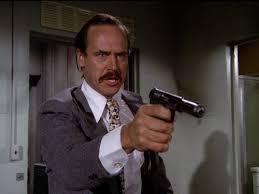

In [18]:
from ultralytics import YOLO

# মডেল লোড করুন
model = YOLO('/content/drive/MyDrive/guntunk/training_results/train/weights/best.pt')

# # Confidence Threshold কমিয়ে দিন
# results = model('/content/drive/MyDrive/guntunk/split_data/test/images/80.jpg', conf=0.25, verbose=True)

results = model('/content/drive/MyDrive/guntunk/split_data/test/images/80.jpg', conf=0.1, imgsz=640)

results[0].show()



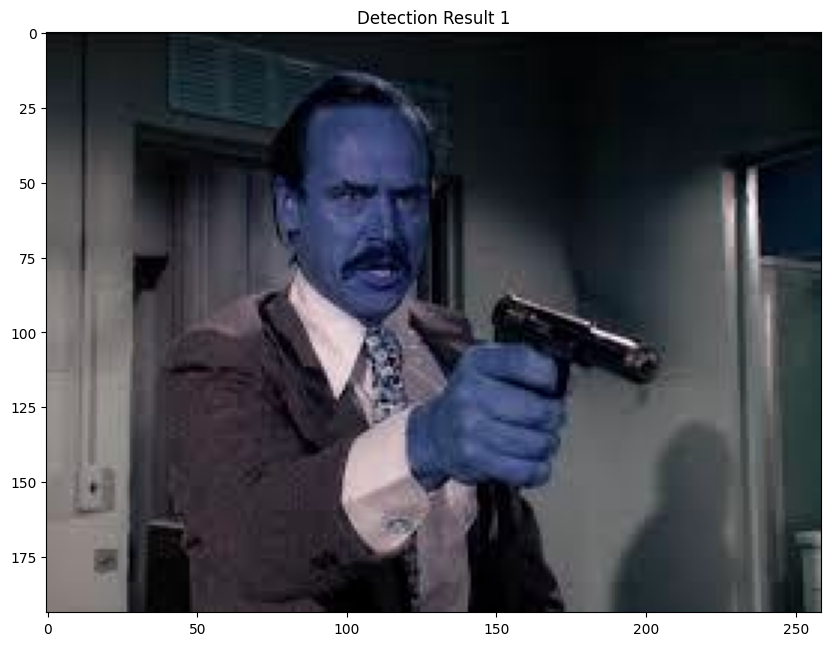

In [19]:
# মডেলের ভেতরের ফিচার ম্যাপ দেখুন
import matplotlib.pyplot as plt

for i, r in enumerate(results):
    plt.figure(figsize=(10,10))
    plt.imshow(r.orig_img)
    plt.title(f"Detection Result {i+1}")
    plt.show()
